# Basic Exploratory Data Analysis

In this notebook I will demonstrate how to download the data and how to visualise one trip. The import statements can be seen as a default for the jupyter notebook in the cookiecutter environment. If you only want to download all the data call:

``python src\data\make_data.py``

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
import numpy as np

#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns

#####
#
# Default way of appending the src directory in the cookiecutter file structure
#
#####

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# By loading the dotenv we can access Environment variables setted int the dm_mobility_task/.env file
# e.g. I setted there my token like this: "KEY_LUKAS"=1234, similary there is one for KEY_RAPHAEL and KEY_MORITZ
load_dotenv(find_dotenv())

# import my method from the source code
%aimport data.data_utils
from data.data_utils import list_recorded_data
from data.data_utils import download_data_sets
from data.data_utils import get_data_per_trip, get_data_per_token
from data.data_utils import download_all
from data.data_utils import VALID_NAMES
%aimport visualization.visualize
from visualization.visualize import plot_track


In [2]:
# the environment variable specified in .env
# lists the recorded data by user
token = os.environ.get("KEY_LUKAS")
recorded_trips = list_recorded_data(token)
recorded_trips

,full_name,last_modified,size
0,868049020858898_20171109-131946,2017-11-10 10:00,11M
1,868049020858898_20171116-074009,2017-11-21 15:00,9.7M
2,868049020858898_20171123-072847,2017-11-23 08:00,6.1M
3,868049020858898_20171123-074632,2017-11-23 08:00,10M


In order to avoid too many request to the server we can use the **full_name** column to download the data and save it to data/raw, but download_data_sets(token) can also download the data per token, or all data from our team can be downloaded with download_all().

In [3]:
# download_data_sets(token) works as well, 
# but than list_recorded_data is invoked again
# we can also download all data for our team by 
# download_all()
tar_file_names = list(recorded_trips["full_name"] + ".csv.tar.gz")
download_data_sets(token, file_names=tar_file_names)


The data has now been downloaded in dm_mobility_task/data/raw/token, we can check that by calling:

In [4]:
from data.data_utils import get_file_names, get_data_dir
# also possible for specific token
# get_file_names(os.path.join(get_data_dir(),"raw"), token=token)
recorded_file_names = get_file_names(os.path.join(get_data_dir(),"raw"))
print("We have recorded: {} trips".format(len(recorded_file_names)))
recorded_file_names

We have recorded: 10 trips


['355007075245007\\355007075245007_20171108-110713.csv.tar.gz',
 '355007075245007\\355007075245007_20171108-132646.csv.tar.gz',
 '355007075245007\\355007075245007_20171121-140720.csv.tar.gz',
 '355007075245007\\355007075245007_20171121-141338.csv.tar.gz',
 '358568053229914\\358568053229914_20171121-144912.csv.tar.gz',
 '358568053229914\\358568053229914_20171121-145403.csv.tar.gz',
 '868049020858898\\868049020858898_20171109-131946.csv.tar.gz',
 '868049020858898\\868049020858898_20171116-074009.csv.tar.gz',
 '868049020858898\\868049020858898_20171123-072847.csv.tar.gz',
 '868049020858898\\868049020858898_20171123-074632.csv.tar.gz']

Now that the data has been downloaded, we can read it from file and start to explore it. I will here only explore data from my key, but with get_data_per_trip(dir_name="raw") it is possible to load all **raw** data per trip in memory.

In [5]:
# read data per trip by for all users by invoking: get_data_per_trip(dir_name="raw")

dfs=get_data_per_token(token)

The data can now be accessed in the following way. Enter one of the following valid names as key in the dictionary:


In [6]:
VALID_NAMES

['annotation', 'cell', 'event', 'location', 'mac', 'marker', 'sensor']

E.g. for the sensor data:

In [18]:
trip_nr = 0
dfs[trip_nr]["sensor"].head(10)

,sensor,time,x,y,z,total
0,acceleration,1510229987055,-0.604904,2.676270,8.625931,9.051796
1,acceleration,1510229987067,-0.592941,2.871277,9.240875,9.694822
2,magnetic,1510229987064,-14.334106,-17.369080,-2.752686,22.687635
3,acceleration,1510229987075,-0.603714,2.852142,9.366501,9.809715
4,acceleration,1510229987085,-0.600128,2.813843,9.447861,9.876230
5,magnetic,1510229987081,-14.382935,-17.369080,-2.362061,22.674501
6,acceleration,1510229987098,-0.579788,2.792313,9.524429,9.942229
7,acceleration,1510229987106,-0.592941,2.792313,9.602203,10.017529
8,magnetic,1510229987098,-14.285278,-18.003845,-2.899170,23.164906
9,magnetic,1510229987114,-14.529419,-17.564392,-2.801514,22.966505


Next we are visualizing the acceleration data:

In [8]:
acceleration_df = dfs[trip_nr]["sensor"]
acceleration_df = acceleration_df[acceleration_df["sensor"]=="acceleration"]
acceleration_df.head(3)

,sensor,time,x,y,z,total
0,acceleration,1510229987055,-0.604904,2.676270,8.625931,9.051796
1,acceleration,1510229987067,-0.592941,2.871277,9.240875,9.694822
3,acceleration,1510229987075,-0.603714,2.852142,9.366501,9.809715


Quick visualisation of the acceleration of one of my trips

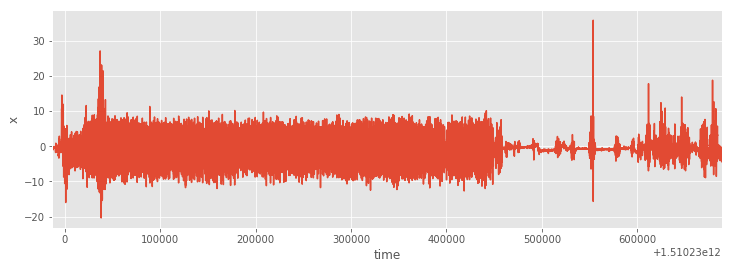

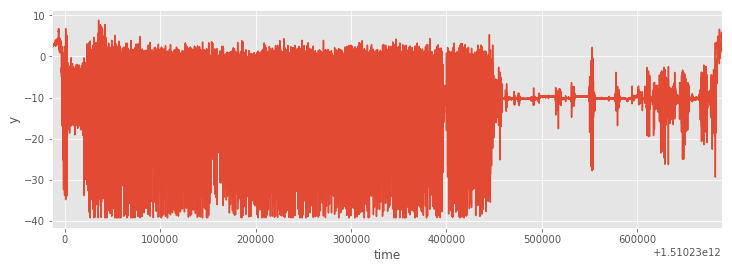

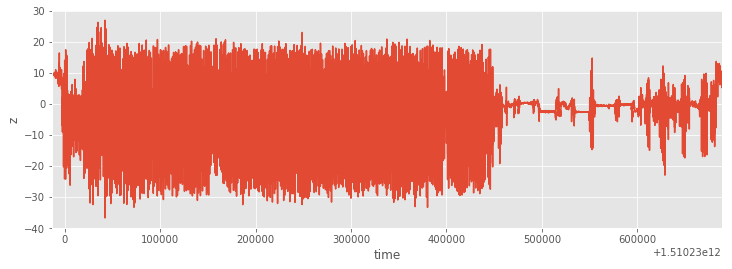

In [9]:
small = acceleration_df.drop(["sensor","total"],axis=1).set_index("time")
figsize=(12, 4)
small["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

small["y"].plot(figsize=figsize);
plt.ylabel("y")
plt.show();

small["z"].plot(figsize=figsize);
plt.ylabel("z")
plt.show();



Plot the gps data on a google map and save it as html to disk:

In [10]:
location_df = dfs[trip_nr]["location"]
file_name = "gps_test.html"
plot_track(location_df[["longitude", "latitude"]], file_name)

The track can now be viewed at:


In [11]:
os.path.join("reports","maps",file_name)

'reports\\maps\\gps_test.html'